---

# Exploring Stochastic Processes: From Basics to Advanced Applications

**Instructor: Dr. Peyvandi**

Welcome to this comprehensive project on stochastic processes. In this notebook, we delve into various fundamental and advanced concepts that underpin stochastic processes. We cover Gaussian distributions, Gaussian processes, Brownian motion, and Markov Chain Monte Carlo (MCMC) methods, providing practical implementations and insights into each area.

## What You Will Learn and Do
1. **Gaussian Distributions**: You'll start with univariate and multivariate Gaussian distributions, learning how to fit these models to data and interpret the results.
2. **Gaussian Processes**: You will generate Gaussian processes using specific mean functions and kernels, visualizing different realizations to understand their variability.
3. **Brownian Motion**: Explore the characteristics of Brownian motion, simulate its trajectories, and apply detrending methods to analyze its behavior.
4. **Markov Chain Monte Carlo (MCMC)**: Dive into MCMC, starting with a simple toy dataset and progressing to complex models. Learn about the Metropolis-Hastings algorithm, understand how to set up and visualize MCMC chains, and extend your knowledge to fit quadratic models.

Each section includes theoretical explanations followed by practical exercises that require you to implement and visualize the results using Python. The exercises are designed to enhance your understanding of stochastic modeling and provide hands-on experience with real-world data.

## Instructions:
1. **Read each section carefully** to grasp the theory behind each stochastic process.
2. **Complete the coding exercises**: Fill in the code sections marked with `...` and `pass` to perform data manipulation, model fitting, and analysis.
3. **Implement and design your own visualizations**: No visualization code is provided. You are encouraged to design your own methods to visualize and interpret the data effectively.
4. **Reflect on your findings**: Answer the questions provided at the end of each section to reflect on the behaviors and characteristics of each process.

## Dataset:
You will work with specific datasets provided within the notebook (e.g., `data1.npy`). Load and examine each dataset as instructed to understand its distribution and characteristics before applying any stochastic models.

## Tools and Libraries:
Before you begin, ensure you have all necessary Python libraries installed, including `numpy`, `matplotlib`, `pandas`, `scipy`, and `sklearn`. These tools are crucial for the calculations and visualizations you will need to perform.

## Project Structure
- **Gaussian Distribution Fitting**: Fit and visualize univariate and bivariate distributions.
- **Simulating and Visualizing Gaussian and Brownian Processes**: Understand the stochastic nature through visualization.
- **Implementing and Visualizing MCMC**: From basic implementations to exploring parameter uncertainties and model fittings.
- **Extending MCMC to Complex Models**: Apply what you have learned to more complex scenarios, enhancing both the model and the fitting process.

By the end of this project, you will have a solid foundation in handling stochastic processes analytically and computationally. 
#### Embark on this analytical journey with enthusiasm and curiosity. Good luck!
--- 

### Required Imports
This section lists all the necessary Python libraries we'll be using in this notebook. Please ensure you have them installed to follow along with the code examples and exercises.

In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import stats
from scipy import spatial
from sklearn.linear_model import LinearRegression


np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

## Gaussian Process
In this section, we will explore Gaussian processes—a fundamental concept in the study of stochastic processes. We will understand their definition, how they are characterized, and their application through practical examples.

### Fitting a Univariate Gaussian Distribution

In this exercise, we will fit a univariate Gaussian distribution to the data provided in `data1.npy`. We will:
1. Load the data.
2. Visualize the data to understand its distribution.
3. Fit a Gaussian model and visualize the results.

Remember, a random variable follows a univariate Gaussian distribution if its probability density function (PDF) is given by:
$$p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)$$
where $ \mu $ is the mean and $\sigma^2 $ is the variance.

data1 shape: (2, 15)


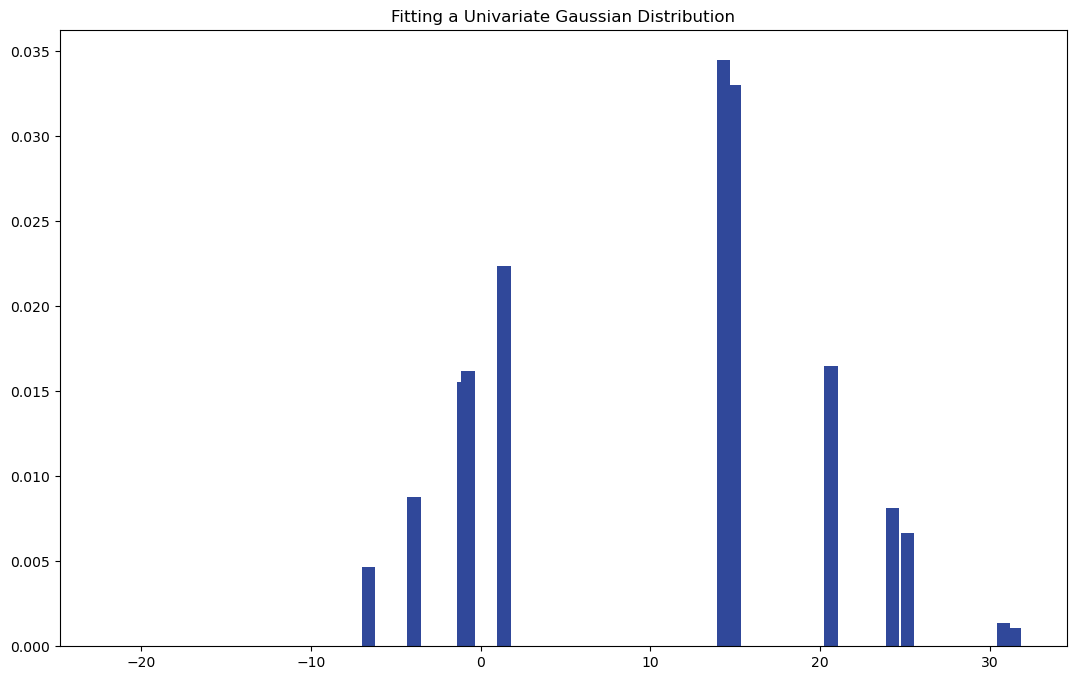

In [2]:
plt.figure(figsize=(13, 8))
# Load data
data1 = np.load('data1.npy')
print("data1 shape:", data1.shape)

# Plot data
data_x, data_y = data1[0], data1[1]
plt.bar(data_x, data_y, color = '#30489A')
plt.title('Fitting a Univariate Gaussian Distribution')
plt.show()

**Data Representation:**
- `data_x = data1[0]`: Represents the sample locations on the x-axis.
- `data_y = data1[1]`: Represents the weights of these samples.

mu: 10.098532935585112 std: 9.751970081480476


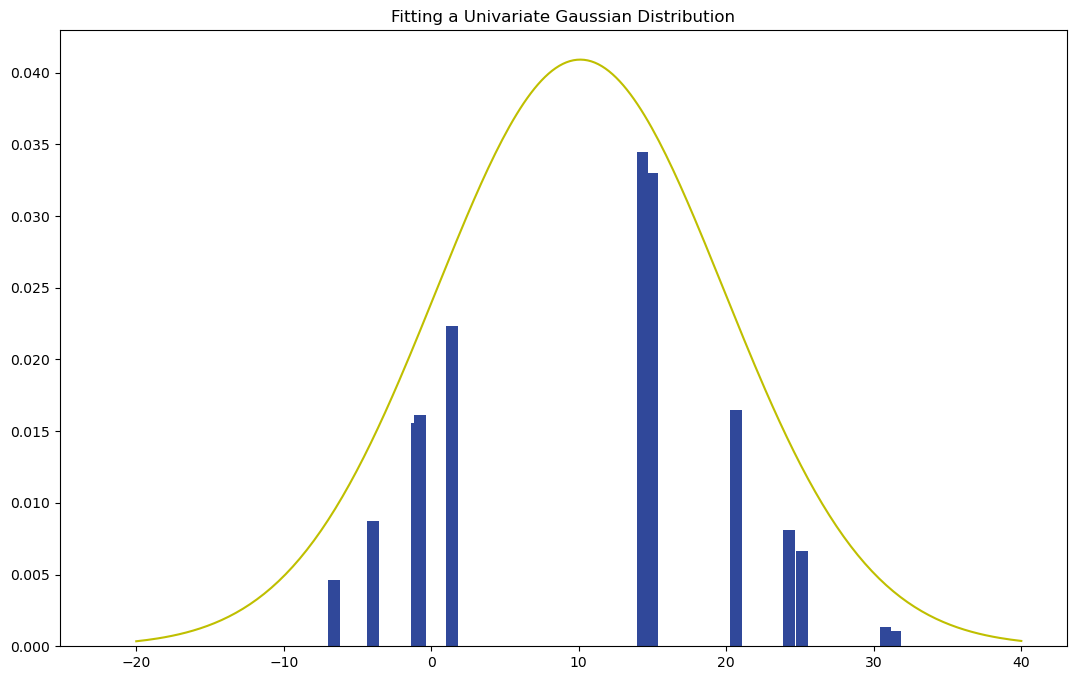

In [3]:
plt.figure(figsize=(13, 8))
# Calculate mean and std (weighted)
mu = np.average(data_x, weights=data_y)
sigma = np.average((data_x-mu)**2, weights=data_y)**0.5
print("mu:", mu, "std:", sigma)


# Generate x and calculate pdf of a gaussian calculated mean and variance
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

X = np.linspace(-20, 40, 250)
Y = np.zeros(len(X))
for i in range(len(Y)):
    Y[i] = normpdf(X[i], mu, sigma)


# Plot samples and the gaussian distribution
plt.bar(data_x, data_y, color='#30489A')
plt.plot(X, Y, 'y')
plt.title('Fitting a Univariate Gaussian Distribution')
plt.show()

### Fitting a Multivariate Gaussian Distribution

In this part, we will extend our analysis to a bivariate Gaussian distribution using the dataset `data2.npy`, which contains points in the form $(x_1,x_2)$. Steps include:
1. Load and visualize the dataset.
2. Compute the mean vector and covariance matrix.
3. Discuss the implications of the covariance structure.

data2 shape: (1000, 2)


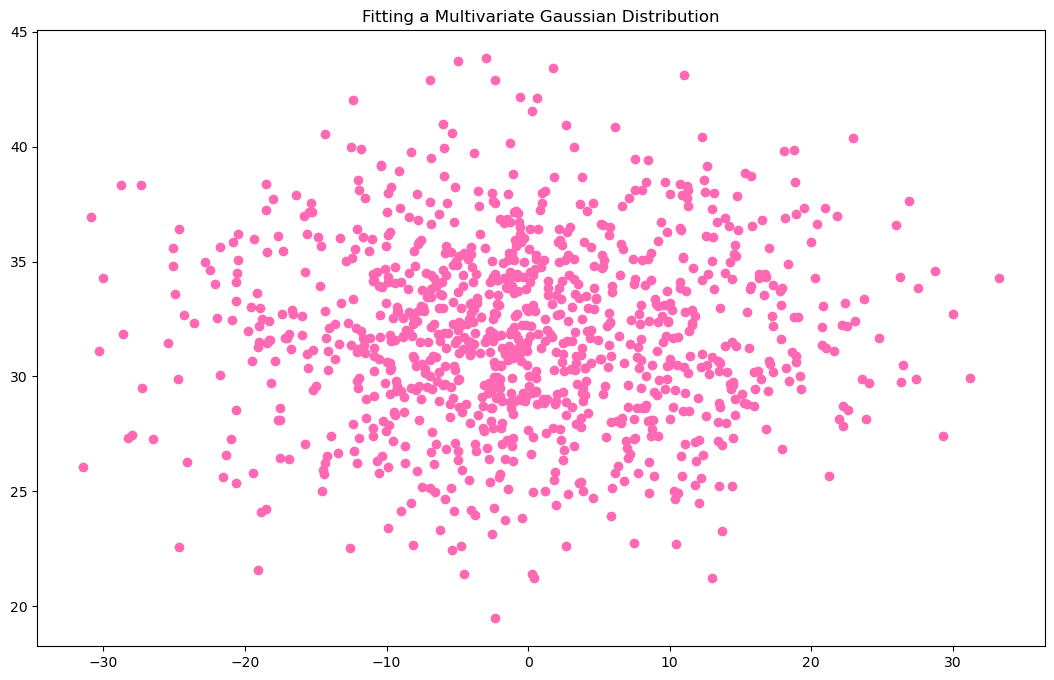

In [4]:
plt.figure(figsize=(13, 8))
# Load data
data2 = np.load('data2.npy')
print("data2 shape:", data2.shape)

# Plot data
for i in range(len(data2)):
    plt.scatter(data2[i,0], data2[i,1], c='hotpink')
plt.title('Fitting a Multivariate Gaussian Distribution')
plt.show()

In [5]:
# Calculate mean vector and covariance matrix
def calculate_mean_vector_and_covariance_matrix(pairs):
    data = np.array(pairs)

    # Calculate the mean vector
    mean_vector = np.mean(data, axis=0)
    
    # Calculate the covariance matrix
    covariance_matrix = np.cov(data, rowvar=False)
    
    return mean_vector, covariance_matrix


mu, sigma = calculate_mean_vector_and_covariance_matrix(data2)

print("mean vector:\n", mu)
print()
print("covariance matrix:\n", sigma)

mean vector:
 [-0.26895121 31.83196193]

covariance matrix:
 [[123.96030401   0.8158547 ]
 [  0.8158547   15.7098274 ]]


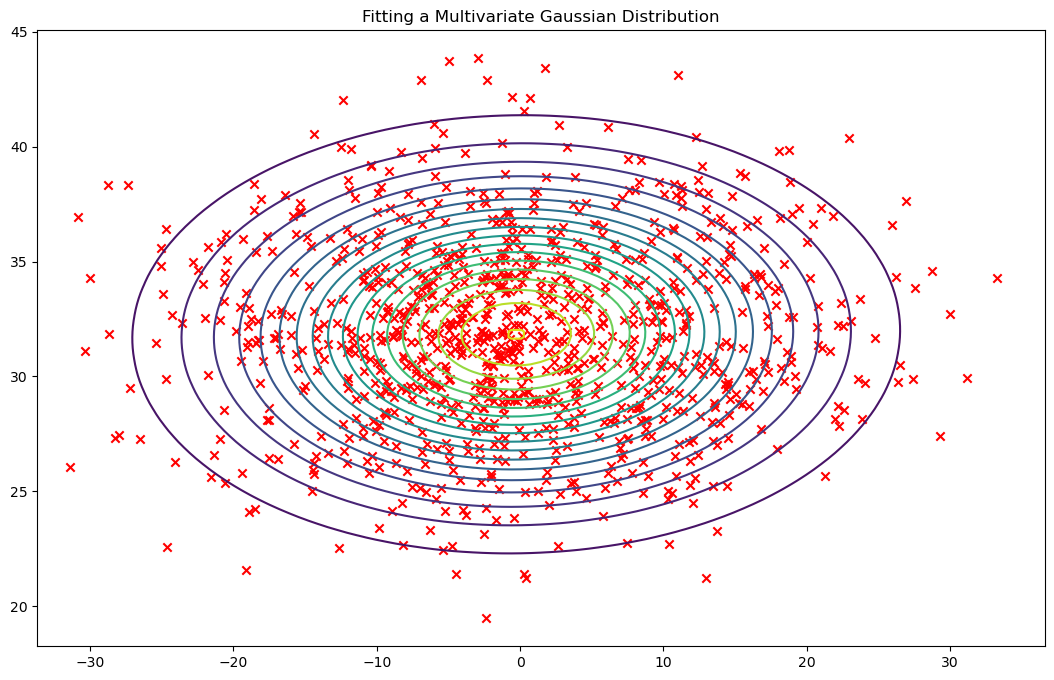

In [6]:
plt.figure(figsize=(13, 8))
# Create a distribution based on mean and covariance
bivariate_dist = stats.multivariate_normal(mean=mu, cov=sigma)

# Create a mesh grid 
x = np.linspace(mu[0] - 3*np.sqrt(sigma[0, 0]), mu[0] + 3*np.sqrt(sigma[0, 0]), 100)
y = np.linspace(mu[1] - 3*np.sqrt(sigma[1, 1]), mu[1] + 3*np.sqrt(sigma[1, 1]), 100)
X, Y = np.meshgrid(x, y)

# Calculate pdf for each point in mesh rid
pos = np.dstack((X, Y))
pdf = bivariate_dist.pdf(pos)
 
# Plot contour
plt.contour(X, Y, pdf, levels=20, cmap='viridis')

# Plot data points

plt.scatter(data2[:, 0], data2[:, 1], color='red', marker='x', label='Data Points')
plt.title('Fitting a Multivariate Gaussian Distribution')

plt.show()

### Generating Gaussian Processes

1. We will generate 10 Gaussian processes with the following characteristics:
- Mean function: $ \mu(t) = 2\log(t) $
- Radial basis function (RBF) kernel: $ e^{-\frac{(x_1 - x_2)^2}{2\sigma^2}} $ with $ \sigma^2 = 0.05$
- Interval: $[0, 4]$

Each process generated will help us visualize different realizations and understand the variability introduced by the stochastic nature of Gaussian processes.

2. Show the processes as well as $\mu(t)$ in a single plot. (set the number of samples as large as the graphs seem smooth)

In [7]:
variance = 0.05


def rbf_kernel(x1, x2):
    gamma = 1 / (2 * (variance))
    dists = (x1-x2)**2
    return np.exp(-gamma * dists)
    

def mean_function_1(t):
    return 2 * np.log(t)

In [8]:
def generate_gaussian(processes_count, interval, kernel_function, mean_function, samples_count=100):
    X = np.linspace(interval[0], interval[1], samples_count)

    M = np.zeros(len(X))
    for i in range(len(X)):
        M[i] = mean_function(X[i])
    
    K = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            K[i, j] = kernel_function(X[i], X[j])
    
    Y = np.random.multivariate_normal(M, K, processes_count)
    return X, Y, M
    
def draw_gaussian(X, Y, M, processes_count):
    plt.figure(figsize=(13, 8))
    # Plot the generated functions
    for i in range(processes_count):
        plt.plot(X, Y[i], lw=1.3, alpha=0.8, marker = 'o', markersize = 1)

    # Plot the mean function
    plt.plot(X, M, 'k', lw=2.1, marker = 'o', markersize=2, label='mean')
    plt.legend(loc="lower right")
    plt.show()
    
def generate_and_draw_gaussian(processes_count, interval, kernel_function, mean_function, samples_count=100):
    X, Y, M = generate_gaussian(processes_count, interval, kernel_function, mean_function, samples_count)
    draw_gaussian(X, Y, M, processes_count)

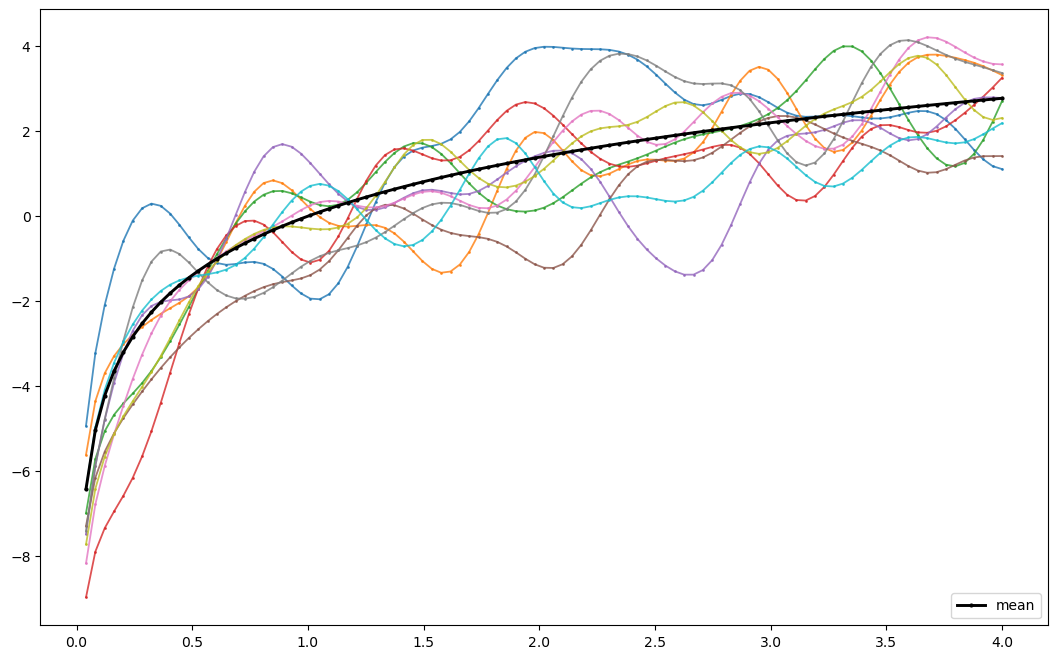

In [9]:
interval = (0,4)
processes_count = 10

generate_and_draw_gaussian(processes_count, interval, rbf_kernel, mean_function_1)

#### Brownian Motion
Brownian motion, also known as Wiener process, is a fundamental stochastic process in finance, physics, and various fields of science. It is characterized by its continuous, nowhere differentiable paths and its strong Markov property. In this section, we will:
1. Define the mathematical properties of Brownian motion.
2. Simulate Brownian motion trajectories.
3. Visualize and discuss the paths generated to better understand their stochastic nature.

Understanding Brownian motion is crucial as it serves as a building block for more complex models like geometric Brownian motion used in stock price modeling.

A standard Brownian motion as a Gaussian process has zero mean, and kernel $k(s, t) = \min{(s, t)}$
<br>
1. Generate 10 Brownian motions in the interval [0, 1].
2. Draw the processes in a single plot with different colors.

In [10]:
def brownian_kernel(x1, x2):
    return np.minimum(x1, x2)

def brownian_mean_function(t):
    return np.zeros_like(t)

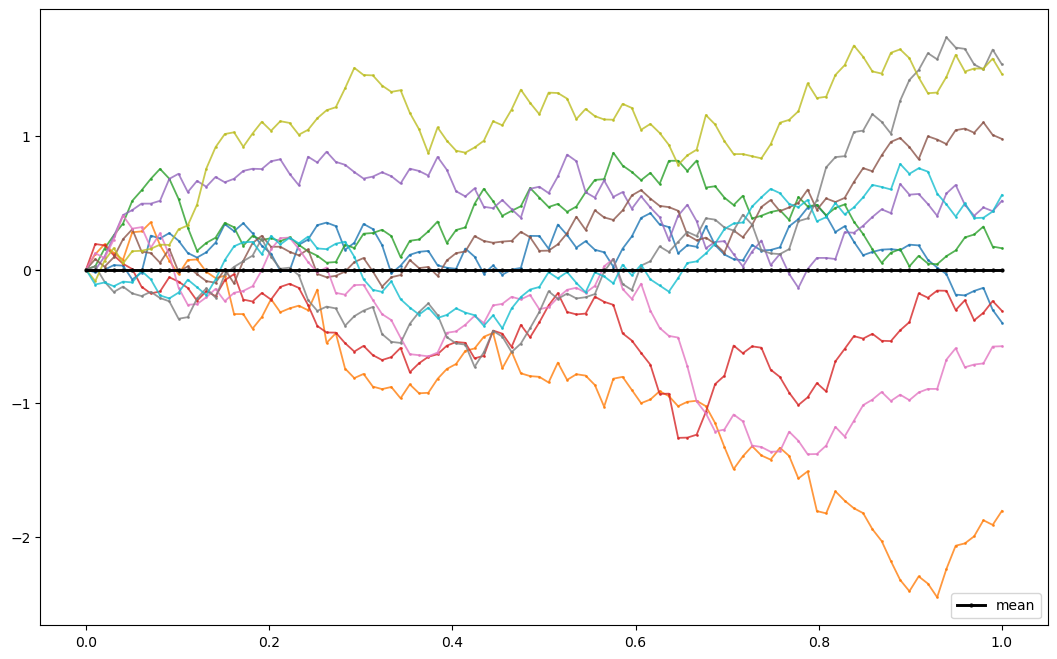

In [11]:
interval = (0,1)
processes_count = 10

generate_and_draw_gaussian(processes_count, interval, brownian_kernel, brownian_mean_function)

As you can see, in the Brownian process, the process gradually moves away from the average value and moves on a new trend.

1. Again generate a Brownian process around zero mean.
2. Apply a linear regression to the above process and by subtracting the data value from this trend, put the mean around zero.
3. This time remove the trend using the ‍‍‍‍**Differencing** method. (these two methods are called **Detrending**)

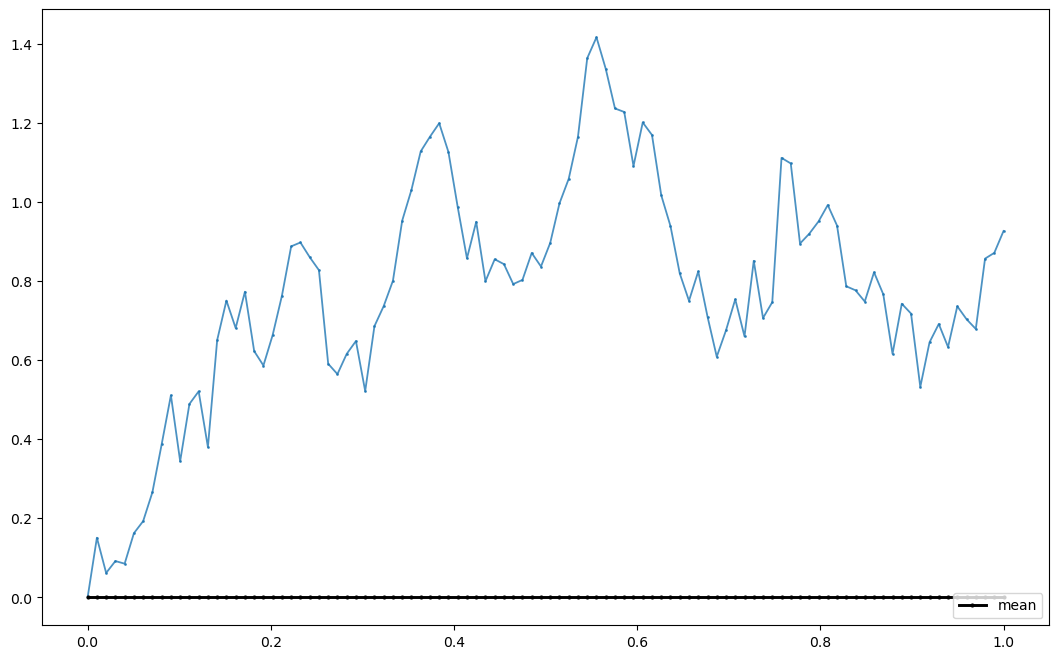

In [12]:
# Generate one gaussian process
samples_count = 100
processes_count = 1
interval = (0,1)
X = np.linspace(interval[0], interval[1], samples_count)
M = np.zeros_like(X)
K = np.zeros((len(X), len(X)))
for i in range(len(X)):
    for j in range(len(X)):
        K[i, j] = brownian_kernel(X[i], X[j])

Y = np.random.multivariate_normal(M, K, processes_count)
draw_gaussian(X, Y, M, processes_count)

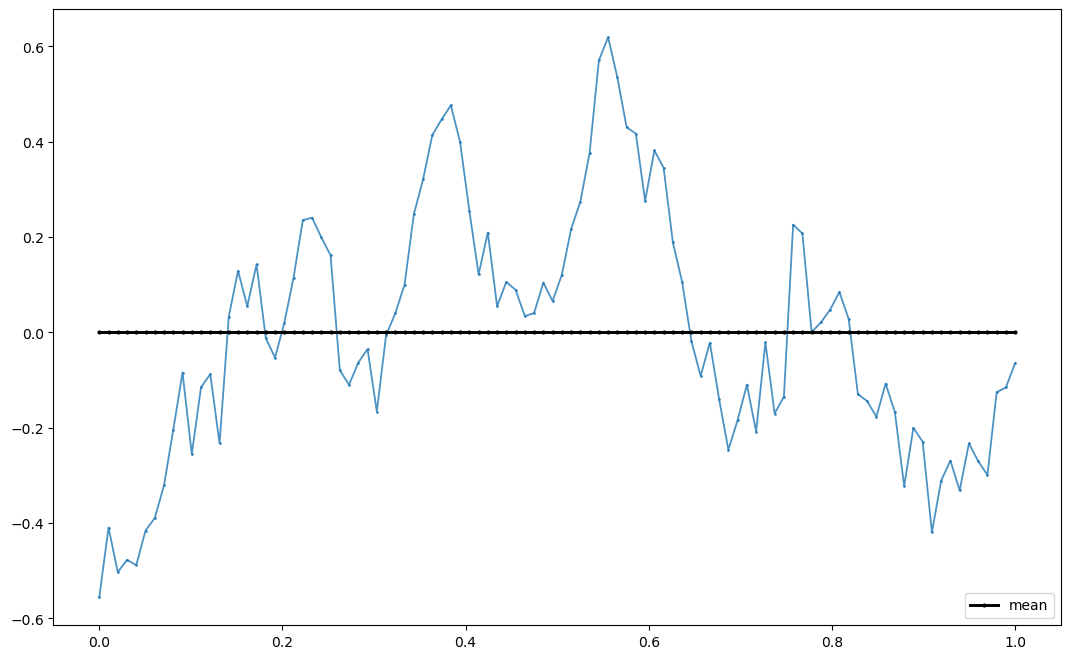

In [13]:
# Detrending using Linear regresion
processes_count = 1
X = np.array(X).reshape(-1, 1)
Y = np.reshape(Y, (len(Y[0]), 1))

model = LinearRegression().fit(X, Y)
prediction = model.predict(X)
new_Y = [Y[i] - prediction[i] for i in range(0, len(Y))]
new_Y = np.reshape(new_Y, (1, len(new_Y)))
draw_gaussian(X, new_Y, M, processes_count)



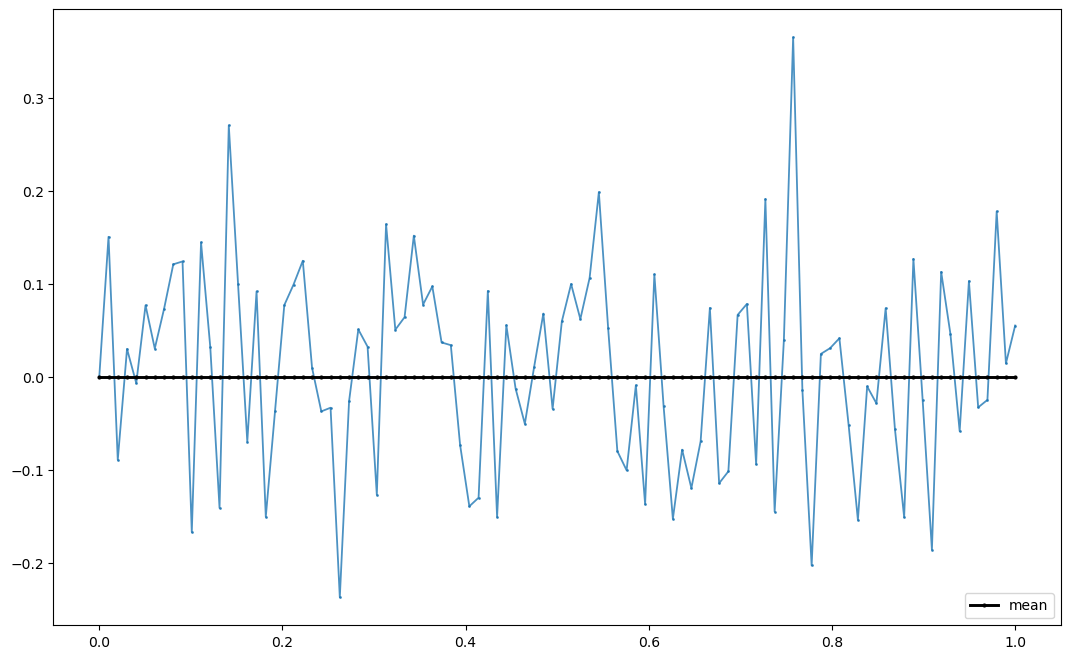

In [14]:
processes_count = 1
# Detrending using Differencing
new_Y = np.zeros_like(Y)

for i in range(1, len(Y)):
    new_Y[i] = Y[i] - Y[i-1]

new_Y = np.reshape(new_Y, (1, len(new_Y)))    
draw_gaussian(X, new_Y, M, processes_count)    

## Markov Chain Monte Carlo (MCMC) 

This section is designed to teach the basics of Markov Chain Monte Carlo (or MCMC), an extremely useful method for determining best-fit paramters and uncertainties from data. This tutorial will create a toy problem and walk through the process of writing a simple MCMC sampling algorithm to determine credible values of the parameters based on the data at hand.

### Creating a Toy Dataset

To illustrate the concepts of MCMC, we will start by generating a simple toy dataset. Our model is a straightforward linear equation defined by two parameters: the slope (`slope`) and the y-intercept (`intercept`). The equation for our line is:

$$ y = \text{slope} \times x + \text{intercept} $$

This setup will help us explore how MCMC can be used to fit a model to data by adjusting these parameters.

In [15]:
x = np.linspace(0, 10, 30)# generate an evenly sampled X axis (not strictly necessary for this problem). 

In [16]:
slope_true = 1.5
intercept_true = 4
uncertainty_true = 1 # These parameters are the "truth" that our MCMC will try to recover.  

In [17]:
y = slope_true * x + intercept_true # Calculate the y values based on the linear model
err = np.random.normal(0, 1, 30)
y = y + err # and add some random noise with
# a Gaussian distribution centered on 0, with a standard deviation of 1. 


#### Visualizing the Dataset and Introducing MCMC

The plot below displays our synthetic dataset, which clearly shows an approximately linear relationship. Next, let's initiate the setup for our Markov Chain Monte Carlo (MCMC) algorithm.


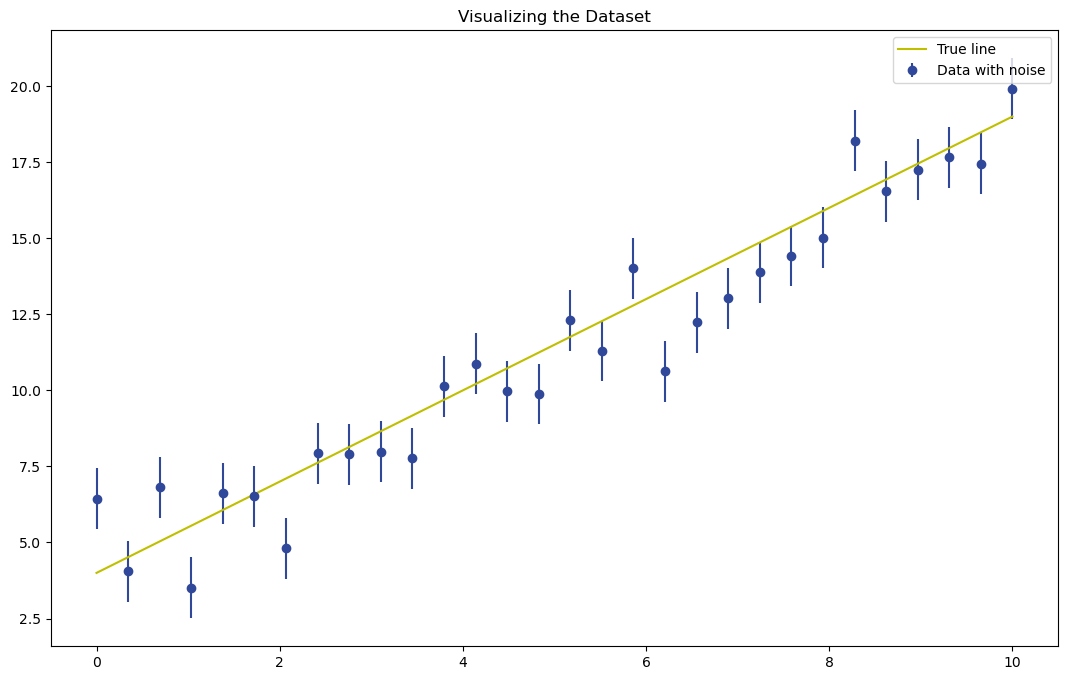

In [18]:
plt.figure(figsize=(13, 8))
plt.errorbar(x, y, yerr=uncertainty_true, fmt='o', label='Data with noise', color='#30489A')
plt.plot(x, slope_true * x + intercept_true, label='True line', color='y')
plt.legend()
plt.title('Visualizing the Dataset')
plt.show()


### Understanding MCMC
Markov Chain Monte Carlo derives its name from its methodology:
- **Markov Chain**: It builds up a sequence of positions in a parameter space based on previously visited positions.
- **Monte Carlo**: It employs randomness to jump through the parameter space.

The essence of MCMC lies in its decision-making process before making a jump to a new position. It evaluates whether the new position is preferable or sufficiently close to the previous one, which ensures that the chain approximates the true underlying probability distributions of the parameters.

#### Choosing an MCMC Method
MCMC algorithms can adopt various strategies for selecting new positions and deciding when to jump. In this tutorial, we utilize one of the simplest methods, the *Metropolis-Hastings* algorithm. A detailed description of this method can be found in Section 2 of Foreman-Mackey et al. (2013), which is accessible [here](https://arxiv.org/abs/1202.3665).

#### Setting Up Variables
We will now define some essential variables for our MCMC process.

In [19]:
npar = 2 # Number of free parameters to fit -- in this case, the slope and intercept
nlink = 100000 # Length of the chain we ultimately will create

chain = np.zeros([nlink, npar]) * np.nan # the actual Markov chain that we will fill with positions during sampling
likelihoods = np.zeros(nlink) * np.nan # the 

A somewhat tricky parameter to set is a jump width that defines how far away from the current position the MCMC sampler will search for the next position to test. If your jump width is too small, your MCMC will be very slow to explore parameter space. If your jump width is too big, your MCMC will zoom around parameter space too far and fail to home in on the right solution. So this parameter can require some tweaking for good results. More sophisticated samplers, like the affine invariate sampler used by emcee, can circumnvent this problem. 

In [20]:
jumpwidth = np.array([0.1, 0.1])# The data points are in the range of 0-10, and have uncertainties ~ 1, 
# and there are 30 points, so order of magnitude, the data / sqrt(num points) is ~0.1 - 1. So let's try 0.1.  

### Defining the Likelihood Function for MCMC

The core of our MCMC setup is the likelihood function, which quantifies the probability of observing the data given specific model parameters. Among various likelihood functions, the **χ² (chi-squared) likelihood function** is widely used, particularly in astronomy.

#### Chi-Squared Likelihood Function
The chi-squared value is calculated as follows:
$ χ² = \sum_{i} \left(\frac{{\text{data}_i - \text{model}_i}}{\text{error}_i}\right)² $

#### Logarithmic Likelihood
From χ², the logarithm of the likelihood (base e) can be determined:
$ \log(L) = -0.5χ² - \sum_{i} \log(\text{error}_i) - \sum_{i} 0.5 \log(2π) $

#### Simplifying Assumptions
For MCMC, the absolute value of the likelihood is not as critical as the ratio between likelihoods, or the differences in their logarithms. Since $0.5 \log(2π)$ is a constant, it can be omitted when comparing likelihoods. Moreover, if the uncertainties are known and consistent across data points, the term $\sum_{i} \log(\text{error}_i)$ also becomes constant and can be ignored.

Thus, for our specific case where uncertainties are known, the log likelihood simplifies to:
$ \log(L) = -0.5χ² $

#### The Model Equation
In our case, the model is represented simply as a linear equation:
$ y = \text{slope} \times x + \text{intercept} $

This streamlined likelihood function allows our MCMC algorithm to focus solely on the essential variable—χ²—to assess model fit.


In [21]:
def loglikelihood(p, x, y, e): # here p is an array of the parameters: let's define p[0] = slope, and p[1] = intercept
    slope = p[0]
    intercept = p[1]
    
    model = slope * x + intercept
    
    chi_squared = np.sum(((y - model) / e) ** 2)
    
    logL = -0.5 * chi_squared
    
    return logL

### Building the MCMC with Metropolis-Hastings

Now, it's time to construct our MCMC using the simple Metropolis-Hastings sampler. This approach involves iteratively testing potential new positions in the parameter space (defined by our model parameters, slope and intercept), and deciding whether to move to these positions based on their likelihoods.

#### Implementation Details
- **Initialization**: We start the chain at an arbitrary position in parameter space, typically where we might expect reasonable values (in this example, `(1,1)` for slope and intercept).
- **Iteration**: For each step in the chain:
  - The first position is manually set, and its likelihood is calculated.
  - For subsequent positions, a new position is proposed by adjusting the last position with a random perturbation defined by a Gaussian distribution scaled by a `jumpwidth`.
  - The likelihood of this new position is then compared to the last position's likelihood.
  - A decision to move to the new position is made based on the ratio of these likelihoods, incorporating a degree of randomness to allow exploration of the parameter space, which includes potentially moving to worse solutions to avoid local minima (a process known as 'decaying').

This process allows the chain to explore the parameter space, moving to positions of higher likelihood but also sampling less likely positions to ensure a comprehensive exploration.

#### Code Implementation
Implement the methodology outlined above in the code cell below. Use the pseudo-code and descriptions as a guide to fill in the necessary logic for the Metropolis-Hastings MCMC algorithm.

In [22]:
all_log_likelihoods = np.ones(nlink)
startpos = np.array([1, 1]) # At which point in (slope, intercept) space should we start our MCMC? Let's try (1,1). 

current_pos = startpos
current_logL = loglikelihood(current_pos, x, y, err)
chain[0] = current_pos
all_log_likelihoods[0] = current_logL

for i in range(nlink): #let's loop through the number of links we wish to test
    new_pos = current_pos + np.random.normal(0, jumpwidth, npar)
    
    new_logL = loglikelihood(new_pos, x, y, err)
    
    log_acceptance_ratio = new_logL - current_logL
    
    if np.log(np.random.rand()) < log_acceptance_ratio:
        current_pos = new_pos
        current_logL = new_logL
    
    chain[i] = current_pos
    all_log_likelihoods[i] = current_logL

### Visualizing MCMC Chains

First, let's visualize the paths taken by the MCMC for both the slope and intercept. These visualizations will help us understand the behavior of the MCMC during the sampling process.

#### Plot the MCMC Paths
Create two subplots to plot the chain values for the slope and intercept across all iterations. Label your axes appropriately. This will show us how the parameters evolve and stabilize over time.

**Remember**: The first few hundred iterations are typically considered the "burn-in" phase.


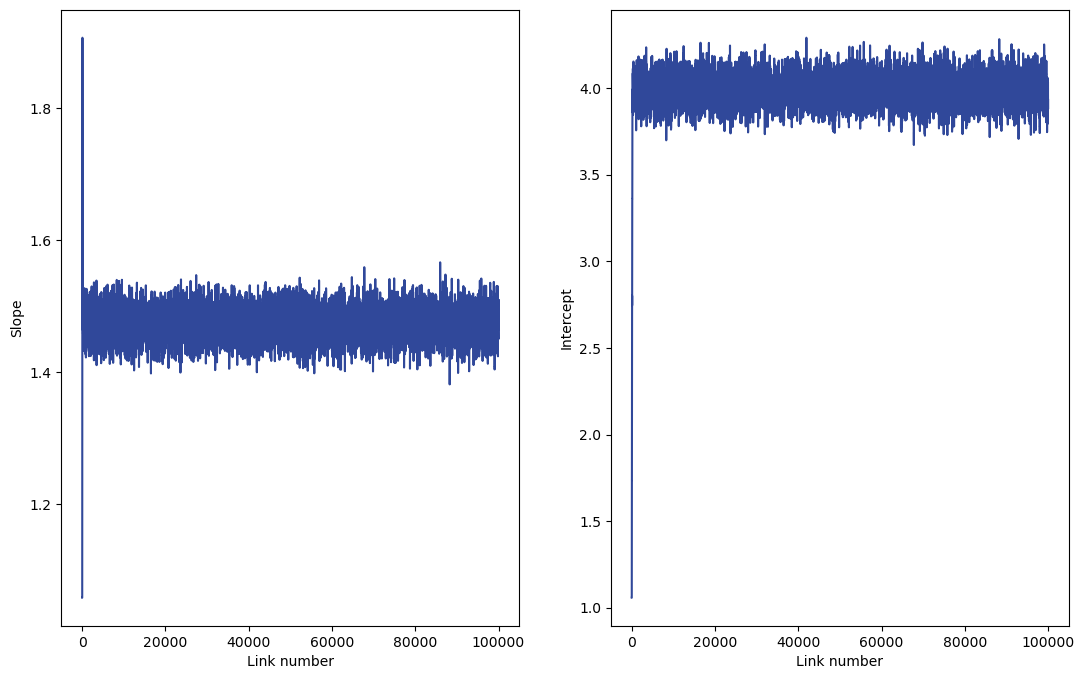

In [23]:
#plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 8))

ax1.plot(chain[:, 0], color='#30489A')
ax1.set_xlabel('Link number')
ax1.set_ylabel('Slope')

ax2.plot(chain[:, 1], color='#30489A')
ax2.set_xlabel('Link number')
ax2.set_ylabel('Intercept')

plt.show()

### #### Removing Burn-In Phase
After identifying the burn-in phase, remove these initial iterations to focus on the stabilized part of the chain.

### Discard the Burn-In Phase
Clip out the first 1000 links of the chain and use the remaining links to analyze the posterior probability distributions of the slope and intercept.

### Analyzing the Posterior Distributions

With the burn-in phase removed, we can now analyze the posterior distributions to gain insights into the estimated parameters.

#### Plot Posterior Distributions
Plot histograms of the slope and intercept using the clipped chains. Calculate and print the median values and uncertainties (standard deviation) for both parameters.

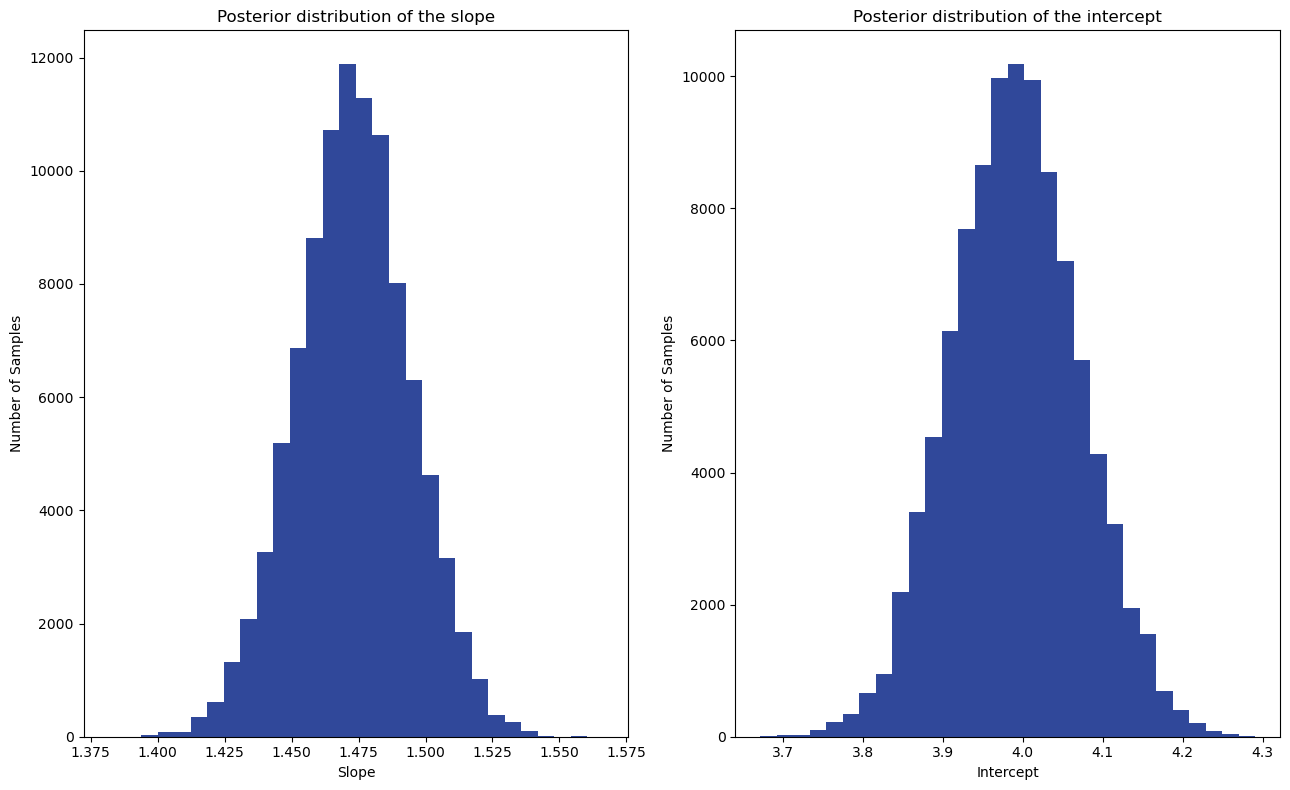

Slope:  1.47 +/- 0.02 , compared to the true value of 1.5
Intercept:  3.99 +/- 0.08 , compared to the true value of 4


In [24]:
# Clip out the first 1000 links to remove the burn-in phase
bchain = chain[1000:]

plt.figure(figsize=(13, 8))

plt.subplot(1, 2, 1)
plt.hist(bchain[:, 0], bins=30, color='#30489A')
plt.title('Posterior distribution of the slope')
plt.xlabel('Slope')
plt.ylabel('Number of Samples')

plt.subplot(1, 2, 2)
plt.hist(bchain[:, 1], bins=30, color='#30489A')
plt.title('Posterior distribution of the intercept')
plt.xlabel('Intercept')
plt.ylabel('Number of Samples')

plt.tight_layout()
plt.show()


slope_median = np.median(bchain[:, 0])
slope_std = np.std(bchain[:, 0])
intercept_median = np.median(bchain[:, 1])
intercept_std = np.std(bchain[:, 1])


print('Slope: ', round(slope_median, 2), '+/-', round(slope_std, 2), ', compared to the true value of', slope_true)
print('Intercept: ', round(intercept_median, 2), '+/-', round(intercept_std, 2), ', compared to the true value of', intercept_true)


### Exploring Parameter Correlations

A key benefit of MCMC is the ability to explore how uncertainties in different parameters relate to each other.

#### Visualize Parameter Correlations
Plot the slope against the intercept from the clipped chain samples to observe any correlation between them. Use scatter plots to highlight individual samples and mark the true parameters for reference.


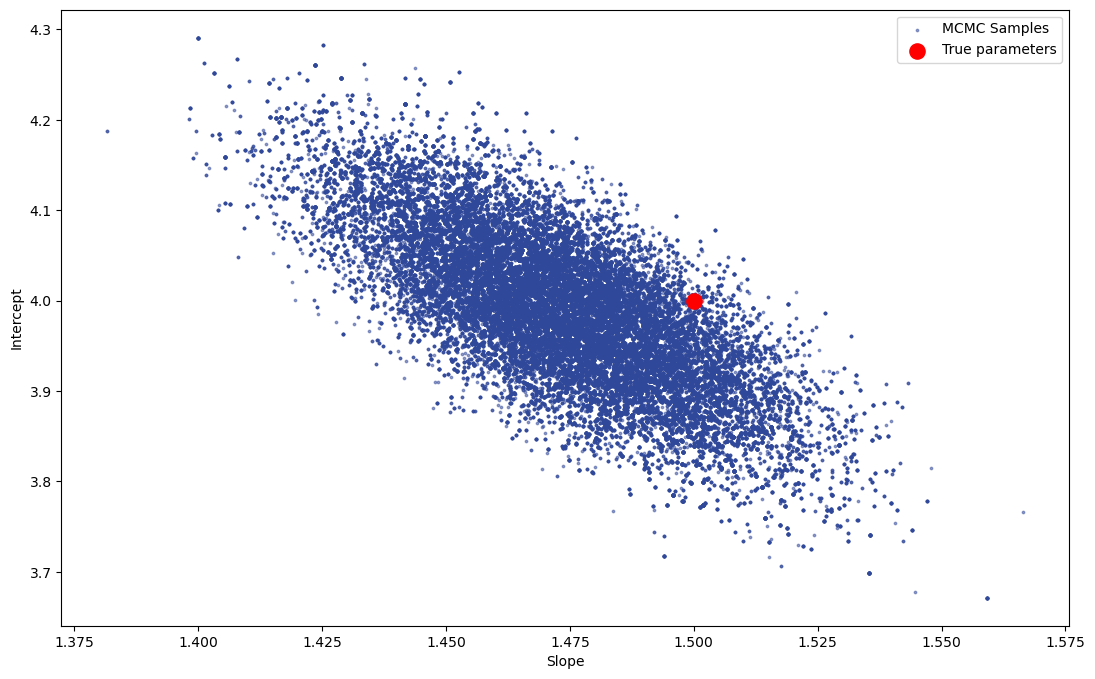

In [25]:
# plot
plt.figure(figsize=(13, 8))
plt.scatter(bchain[:, 0], bchain[:, 1], s=3, alpha=0.5, label='MCMC Samples', color='#30489A')

plt.scatter(slope_true, intercept_true, s=120,  color='red', label='True parameters')

plt.xlabel('Slope')
plt.ylabel('Intercept')
plt.legend()
plt.show()


### Advanced Visualization with Corner.py

For a more comprehensive visualization of parameter correlations and distributions, we can use the `corner.py` package.

#### Install and Use Corner.py
Install `corner.py` and use it to create a compact visualization of the chains. Ensure to label the axes with 'slope' and 'intercept'.


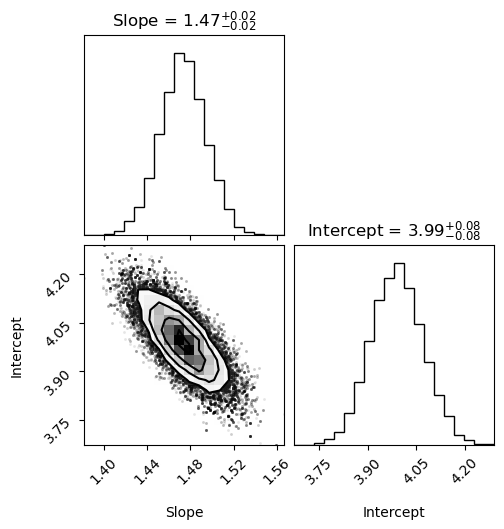

In [26]:
import corner
labels = ["Slope", "Intercept"]
figure = corner.corner(bchain, labels=labels, show_titles=True, title_kwargs={"fontsize": 12})




### Plotting the Best-Fit Model

Finally, let's use the MCMC results to plot the best-fit model against our original dataset.

#### Plot the Best-Fit Model
Find the parameters with the highest log likelihood, compute the model predictions, and plot these against the original data points. Highlight the best-fit model and add a legend.


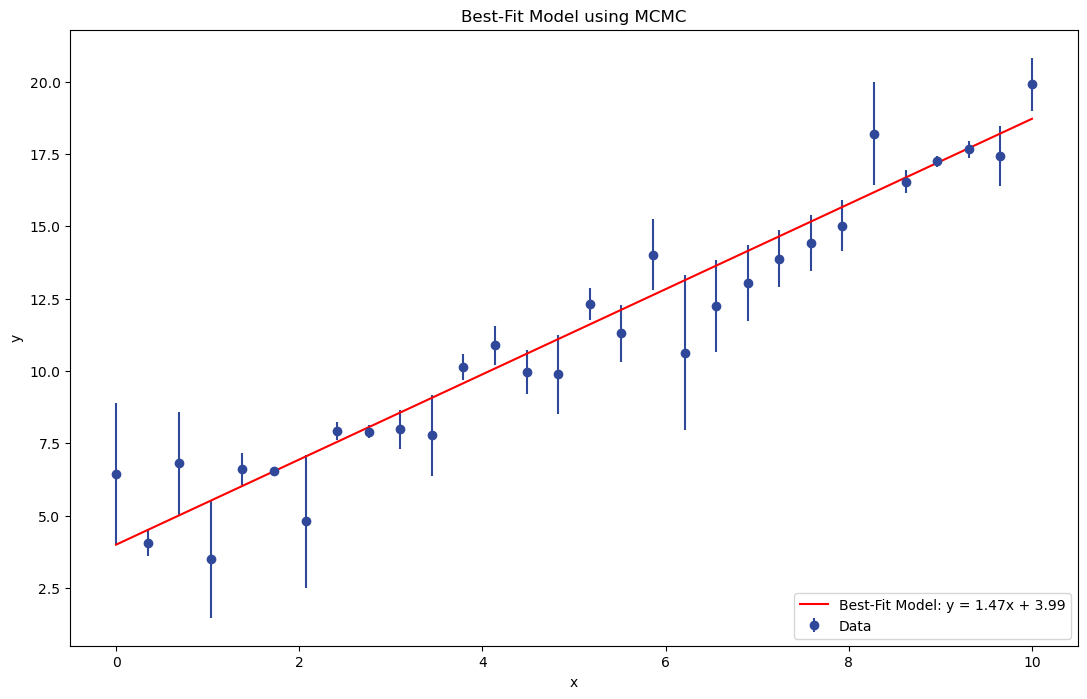

In [27]:
plt.figure(figsize=(13, 8))

best_index = np.argmax(all_log_likelihoods)
best_params = chain[best_index]

slope_best = best_params[0]
intercept_best = best_params[1]
model_best_fit = slope_best * x + intercept_best
err = np.abs(err)

plt.errorbar(x, y, yerr=err, fmt='o', label='Data', color='#30489A')
plt.plot(x, model_best_fit, label=f'Best-Fit Model: y = {slope_best:.2f}x + {intercept_best:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.title('Best-Fit Model using MCMC')
plt.show()


### Indicating Uncertainty in the Fit

To better understand the range of plausible models, plot additional models drawn randomly from the posterior distribution over the original data.

#### Plot Models from the Posterior
Select a number of parameter sets randomly from the posterior distribution. For each set, plot the corresponding model to visualize the range of uncertainty in the fit.


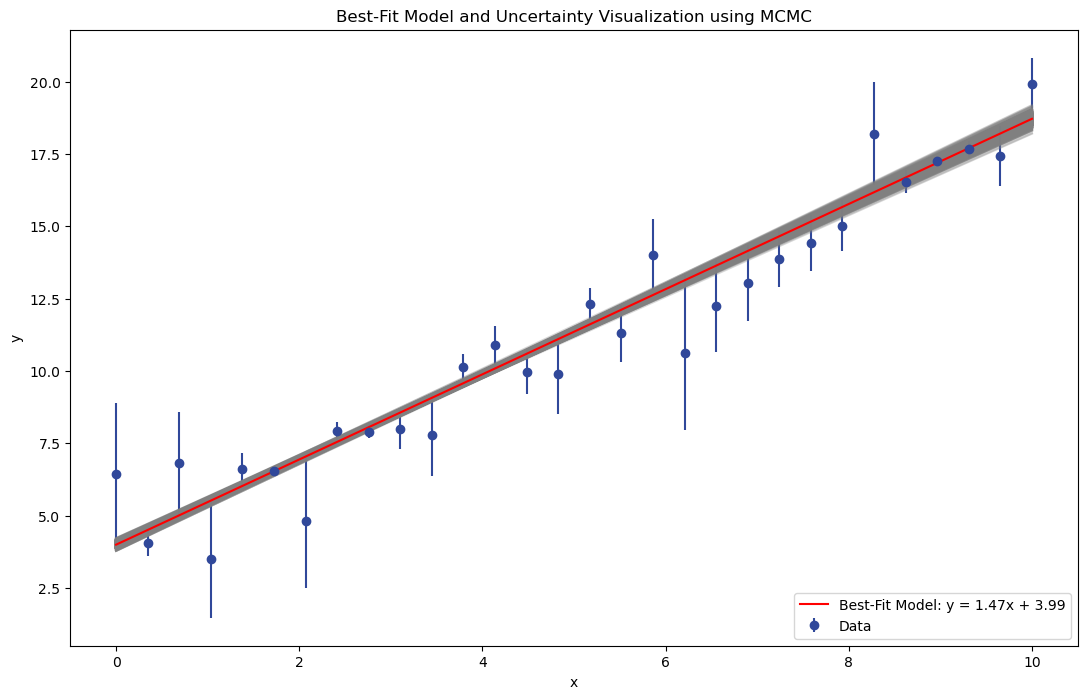

In [28]:
plt.figure(figsize=(13, 8))

plt.errorbar(x, y, yerr=err, fmt='o', label='Data', color='#30489A')

n_samples = 1000
sample_indices = np.random.choice(np.arange(nlink), size=n_samples, replace=False)
for idx in sample_indices:
    sample_params = chain[idx]
    slope_sample = sample_params[0]
    intercept_sample = sample_params[1]
    model_sample = slope_sample * x + intercept_sample
    plt.plot(x, model_sample, color='gray', alpha=0.3)

plt.plot(x, model_best_fit, label=f'Best-Fit Model: y = {slope_best:.2f}x + {intercept_best:.2f}', color='red')

plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="lower right")
plt.title('Best-Fit Model and Uncertainty Visualization using MCMC')
plt.show()

### Limitations of the Metropolis-Hastings Algorithm

While the Metropolis-Hastings algorithm performs well for simple models, it becomes less efficient as the complexity of the model increases. Modern MCMC techniques employ more sophisticated algorithms to better sample new locations in parameter space.

#### Exploring Advanced MCMC Techniques

Two notable algorithms that offer improvements are:

1. **Affine-Invariant MCMC Sampler**: This technique is robust to degeneracies between parameters and scales well with the number of parameters. It was originally described by Goodman & Weare and is implemented in the [emcee Python package](https://emcee.readthedocs.io/en/stable/). [Learn more about it here.](https://ui.adsabs.harvard.edu/abs/2010CAMCS...5...65G/abstract)

2. **Differential Evolution MCMC Sampler**: Known for its effectiveness in multi-modal optimization, this sampler was initially described by ter Braak and is available in the [edmcmc Python package](https://github.com/avanderburg/edmcmc). [Read more about this method.](http://dx.doi.org/10.1007/s11222-006-8769-1)

To see a practical implementation of the linear model using the edmcmc approach, explore this [Jupyter notebook](https://github.com/avanderburg/edmcmc/blob/main/test_edmcmc.ipynb).

### Challenge: Extending to a Quadratic Model

Now, let's extend our exploration by fitting a quadratic model to a new dataset, which will introduce a significant curvature and require an additional parameter.

#### New Dataset Preparation

Generate a new dataset with significant curvature, which will be used to test our extended MCMC model:

- **X values**: Evenly spaced over a range.
- **True Parameters**: Slope, intercept, and a quadratic term.
- **Noise**: Gaussian noise added to simulate real-world data variability.

#### Implement the Quadratic Model

Use the provided dataset to implement a quadratic fit. This involves modifying existing cells to incorporate an additional quadratic term in both the model equation and the likelihood function.

In [29]:
xnew = np.linspace(0, 10, 30) # generate an evenly sampled X axis. 

In [30]:
slope_true = 1.5
intercept_true = 4
quadratic_true = -0.2
uncertainty_true = 1 # These parameters are the "truth" that our MCMC will try to recover.  

In [31]:
ynew = quadratic_true * xnew**2 + slope_true * xnew + intercept_true  # Calculate the y values based on the quadratic model
errnew = np.random.normal(0, 1, 30)
ynew = ynew + errnew # and add some random noise with
# a Gaussian distribution centered on 0, with a standard deviation of 1. 


#### Visualization

Plot the generated dataset with error bars to visualize the fit and assess the effectiveness of the model adjustments.


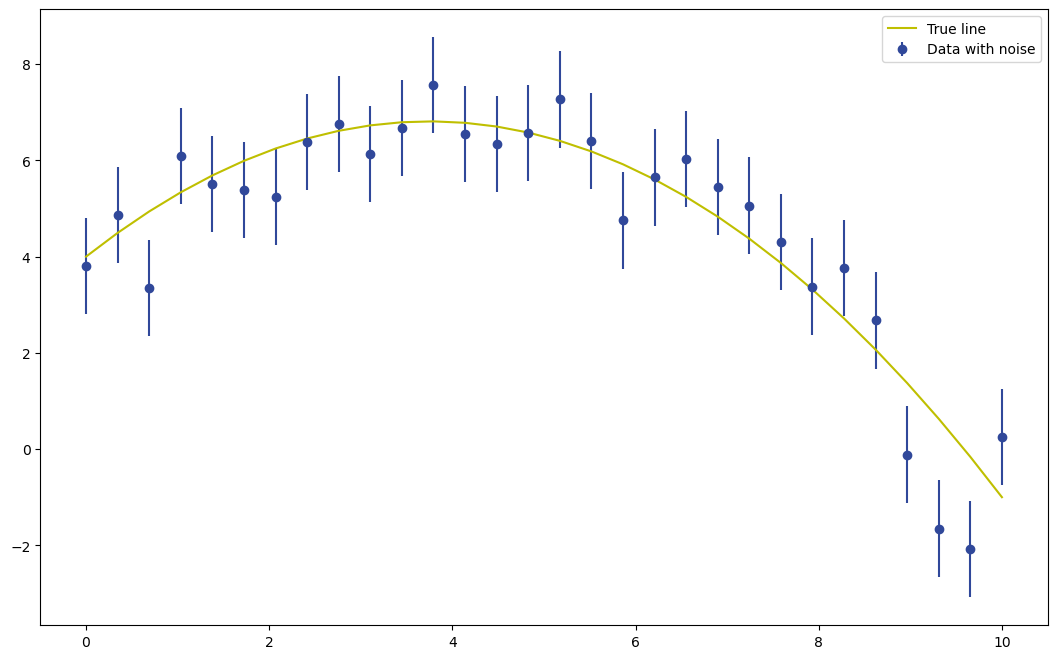

In [32]:
plt.figure(figsize=(13, 8))
plt.errorbar(xnew, ynew, yerr=uncertainty_true, fmt='o', label='Data with noise', color='#30489A')
plt.plot(x, quadratic_true * xnew**2 + slope_true * xnew + intercept_true, label='True line', color='y')
plt.legend()
plt.show()

Think carefully about which cells from above must be modified to fit for an additional parameter, and how this new quadratic term must be incorporated into the likelihood function and the visualizations after the fit. Good luck!